# Graph Traversing

## Undirected, unweighted graph

In [1]:
graph = {'A': ['B', 'C'],
         'B': ['A', 'C', 'D'],
         'C': ['A', 'B', 'D', 'E'],
         'D': ['B', 'C', 'E', 'F'],
         'E': ['C', 'D', 'F'],
         'F': ['D', 'E']}

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

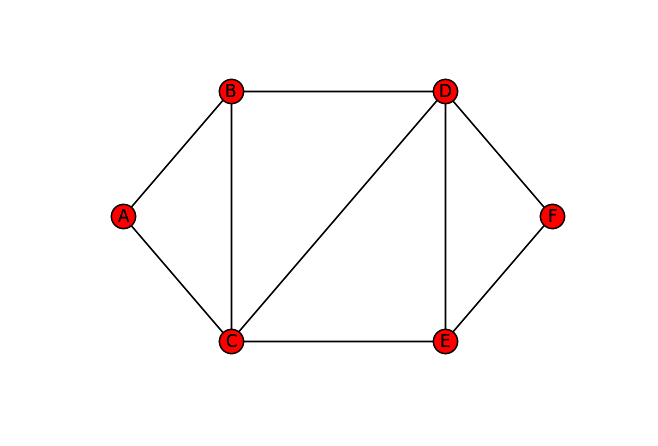

In [3]:
Graph = nx.Graph()
for node in graph:
    Graph.add_nodes_from(node)
    for edge in graph[node]:
        Graph.add_edge(node,edge)

pos = { 'A': [0.00, 0.50], 'B': [0.25, 0.75],
        'C': [0.25, 0.25], 'D': [0.75, 0.75],
        'E': [0.75, 0.25], 'F': [1.00, 0.50]}
        
nx.draw(Graph, pos, with_labels=True)
nx.draw_networkx(Graph, pos)
plt.show()

## Breadth First Search

In [4]:
def bfs(graph, start):
    queue = [start]
    queued = list()
    path = list()
    while queue:
        print ('Queue is: %s' % queue)
        vertex = queue.pop(0)
        print ('Processing %s' % vertex)
        for candidate in graph[vertex]:
            if candidate not in queued:
                queued.append(candidate)
                queue.append(candidate)
                path.append(vertex+'>'+candidate)
                print ('Adding %s to the queue' 
                       % candidate)
    return path

steps = bfs(graph, 'A')
print ('\nBFS:', steps)

Queue is: ['A']
Processing A
Adding B to the queue
Adding C to the queue
Queue is: ['B', 'C']
Processing B
Adding A to the queue
Adding D to the queue
Queue is: ['C', 'A', 'D']
Processing C
Adding E to the queue
Queue is: ['A', 'D', 'E']
Processing A
Queue is: ['D', 'E']
Processing D
Adding F to the queue
Queue is: ['E', 'F']
Processing E
Queue is: ['F']
Processing F

BFS: ['A>B', 'A>C', 'B>A', 'B>D', 'C>E', 'D>F']


## Depth First Search

In [5]:
def dfs(graph, start):
    stack = [start]
    parents = {start: start}
    path = list()
    while stack:
        print ('Stack is: %s' % stack)
        vertex = stack.pop(-1)
        print ('Processing %s' % vertex)
        for candidate in graph[vertex]:
            if candidate not in parents:
                parents[candidate] = vertex
                stack.append(candidate)
                print ('Adding %s to the stack' 
                       % candidate)
        path.append(parents[vertex]+'>'+vertex)
    return path[1:]

steps = dfs(graph, 'A')
print ('\nDFS:', steps)

Stack is: ['A']
Processing A
Adding B to the stack
Adding C to the stack
Stack is: ['B', 'C']
Processing C
Adding D to the stack
Adding E to the stack
Stack is: ['B', 'D', 'E']
Processing E
Adding F to the stack
Stack is: ['B', 'D', 'F']
Processing F
Stack is: ['B', 'D']
Processing D
Stack is: ['B']
Processing B

DFS: ['A>C', 'C>E', 'E>F', 'C>D', 'A>B']
